# Module 

In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from src.config import criteo_csv_sep, criteo_df_cols
from src.utils.plot_utils import count_plot
# from scripts.train_config import raw_data_dir
from sklearn.preprocessing import OneHotEncoder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Config 

In [2]:
criteo_data_dir = '../data/raw_criteo_data/train.txt'
# criteo_data_dir = '../data/debug/criteo//train.txt'

# Data Overview

In [3]:
df = pd.read_csv(criteo_data_dir,
                 nrows=2000000,
                 sep=criteo_csv_sep, 
                 header=None, names=criteo_df_cols)

In [4]:
df.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,1.0,1,5.0,0.0,1382.0,4.0,15.0,2.0,181.0,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16
1,0,2.0,0,44.0,1.0,102.0,8.0,2.0,2.0,4.0,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655
2,0,2.0,0,1.0,14.0,767.0,89.0,4.0,2.0,245.0,...,8efede7f,3412118d,NaN,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN
3,0,NaN,893,NaN,NaN,4392.0,NaN,0.0,0.0,0.0,...,1e88c74f,74ef3502,NaN,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN
4,0,3.0,-1,NaN,0.0,2.0,0.0,3.0,0.0,0.0,...,1e88c74f,26b3c7a7,NaN,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN


In [7]:
df.shape

(2000000, 40)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 40 columns):
 #   Column  Dtype  
---  ------  -----  
 0   label   int64  
 1   I1      float64
 2   I2      int64  
 3   I3      float64
 4   I4      float64
 5   I5      float64
 6   I6      float64
 7   I7      float64
 8   I8      float64
 9   I9      float64
 10  I10     float64
 11  I11     float64
 12  I12     float64
 13  I13     float64
 14  C1      object 
 15  C2      object 
 16  C3      object 
 17  C4      object 
 18  C5      object 
 19  C6      object 
 20  C7      object 
 21  C8      object 
 22  C9      object 
 23  C10     object 
 24  C11     object 
 25  C12     object 
 26  C13     object 
 27  C14     object 
 28  C15     object 
 29  C16     object 
 30  C17     object 
 31  C18     object 
 32  C19     object 
 33  C20     object 
 34  C21     object 
 35  C22     object 
 36  C23     object 
 37  C24     object 
 38  C25     object 
 39  C26     object 
dtype

## Label Distribution 

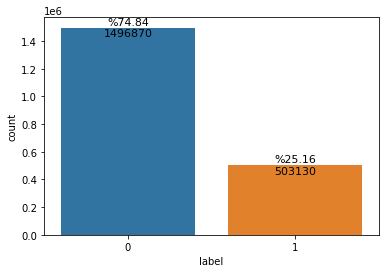

In [9]:
count_plot(df=df, col="label")

In [11]:
print(f"negative/positive: {round(74.84/25.16, 3)}")

negative/positive: 2.975


# Create debug data

In [24]:
df.to_csv("../data/debug/criteo/train.txt", index=False, header=None, sep=criteo_csv_sep)

# Debug 

In [35]:
from numpy import array

In [36]:
a = {'C1': array([1, 1]), 'C2': array([1, 2]), 'C3': array([2, 1]), 'C4': array([2, 1]), 'C5': array([1, 1]), 'C6': array([1, 2]), 'C7': array([2, 1]), 'C8': array([2, 1]), 'C9': array([1, 1]), 'C10': array([2, 1]), 'C11': array([2, 1]), 'C12': array([1, 2]), 'C13': array([1, 2]), 'C14': array([1, 2]), 'C15': array([1, 2]), 'C16': array([1, 2]), 'C17': array([2, 1]), 'C18': array([2, 1]), 'C19': array([1, 1]), 'C20': array([2, 1]), 'C21': array([1, 2]), 'C22': array([1, 1]), 'C23': array([1, 1]), 'C24': array([2, 1]), 'C25': array([1, 1]), 'C26': array([2, 1]), 'I1': array([1., 2.]), 'I2': array([1, 0]), 'I3': array([ 5., 44.]), 'I4': array([0., 1.]), 'I5': array([1382.,  102.]), 'I6': array([4., 8.]), 'I7': array([15.,  2.]), 'I8': array([2, 2]), 'I9': array([181.,   4.]), 'I10': array([1., 1.]), 'I11': array([2., 1.]), 'I12': array([0., 0.]), 'I13': array([2., 4.])}

b = {'C1': array([1, 1]), 'C2': array([1, 2]), 'C3': array([2, 1]), 'C4': array([2, 1]), 'C5': array([1, 1]), 'C6': array([1, 2]), 'C7': array([2, 1]), 'C8': array([2, 1]), 'C9': array([1, 1]), 'C10': array([2, 1]), 'C11': array([2, 1]), 'C12': array([1, 2]), 'C13': array([1, 2]), 'C14': array([1, 2]), 'C15': array([1, 2]), 'C16': array([1, 2]), 'C17': array([2, 1]), 'C18': array([2, 1]), 'C19': array([1, 1]), 'C20': array([2, 1]), 'C21': array([1, 2]), 'C22': array([1, 1]), 'C23': array([1, 1]), 'C24': array([2, 1]), 'C25': array([1, 1]), 'C26': array([2, 1]), 'I1': array([1., 2.]), 'I2': array([1, 0]), 'I3': array([ 5., 44.]), 'I4': array([0., 1.]), 'I5': array([1382.,  102.]), 'I6': array([4., 8.]), 'I7': array([15.,  2.]), 'I8': array([2, 2]), 'I9': array([181.,   4.]), 'I10': array([1., 1.]), 'I11': array([2., 1.]), 'I12': array([0., 0.]), 'I13': array([2., 4.])}


In [39]:
a.keys() == b.keys()

True

In [41]:
a.values() == b.values()

False

In [45]:
sum(a['C1'] == b['C1'])

2

In [50]:
for key in a.keys():
    print(key)
    match = a[key] == b[key]
    match_sum = sum(match)
    print(match)
    if match_sum != 2:
        print('hh')

C1
[ True  True]
C2
[ True  True]
C3
[ True  True]
C4
[ True  True]
C5
[ True  True]
C6
[ True  True]
C7
[ True  True]
C8
[ True  True]
C9
[ True  True]
C10
[ True  True]
C11
[ True  True]
C12
[ True  True]
C13
[ True  True]
C14
[ True  True]
C15
[ True  True]
C16
[ True  True]
C17
[ True  True]
C18
[ True  True]
C19
[ True  True]
C20
[ True  True]
C21
[ True  True]
C22
[ True  True]
C23
[ True  True]
C24
[ True  True]
C25
[ True  True]
C26
[ True  True]
I1
[ True  True]
I2
[ True  True]
I3
[ True  True]
I4
[ True  True]
I5
[ True  True]
I6
[ True  True]
I7
[ True  True]
I8
[ True  True]
I9
[ True  True]
I10
[ True  True]
I11
[ True  True]
I12
[ True  True]
I13
[ True  True]


# Playground 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 40 columns):
 #   Column  Dtype  
---  ------  -----  
 0   label   int64  
 1   I1      float64
 2   I2      int64  
 3   I3      float64
 4   I4      float64
 5   I5      float64
 6   I6      float64
 7   I7      float64
 8   I8      float64
 9   I9      float64
 10  I10     float64
 11  I11     float64
 12  I12     float64
 13  I13     float64
 14  C1      object 
 15  C2      object 
 16  C3      object 
 17  C4      object 
 18  C5      object 
 19  C6      object 
 20  C7      object 
 21  C8      object 
 22  C9      object 
 23  C10     object 
 24  C11     object 
 25  C12     object 
 26  C13     object 
 27  C14     object 
 28  C15     object 
 29  C16     object 
 30  C17     object 
 31  C18     object 
 32  C19     object 
 33  C20     object 
 34  C21     object 
 35  C22     object 
 36  C23     object 
 37  C24     object 
 38  C25     object 
 39  C26     object 
dtype

In [16]:
one_hot_encoder = OneHotEncoder()

In [27]:
res = one_hot_encoder.fit_transform(df[['C1', 'C2']])

In [30]:
res.toarray().shape

(2000000, 1911)

In [31]:
df = res.toarray()

In [34]:
test_df = pd.DataFrame(df)

In [37]:
test_df.columns

RangeIndex(start=0, stop=1911, step=1)

In [41]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
test_df.append(test_df)

KeyboardInterrupt: 

In [43]:
test_df[0]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1999995    0.0
1999996    0.0
1999997    0.0
1999998    0.0
1999999    0.0
Name: 0, Length: 2000000, dtype: float64